# linear regression
## spring
[link](https://docs.google.com/presentation/d/1L1LwpKm5DxhHndiyyiZ3wJA2mKOJTQ2heKo45Me5yVg/edit#slide=id.g1eaee6a347_0_8)

## fall
[link](https://ntumlta.github.io/2017fall-ml-hw1/)

- hw1.sh
 - Python3.5+ required
 - Only (1)numpy (2)scipy (3)pandas are allowed
 - numpy.linalg.lstsq is forbidden.
 - Please handcraft "linear regression" using Gradient Descent
 - beat public simple baseline
 - For those who wish to load model instead of running whole training precess:
 - please upload your training code named train.py
 - as long as there are Gradient Descent Code in train.py, it's fine
- hw1_best.sh
 - Python3.5+ required
 - any library is allowed
 - meet the higher score you choose in kaggle
 
 ### Data 簡介

* [train.csv](./data/train.csv) : 每個月前20天每個小時的氣象資料(每小時有18種測資)。共12個月。
* [test.csv](./data/test.csv) : 排除train.csv中剩餘的資料，取連續9小時的資料當feature，預測第10小時的PM2.5值。總共取240筆不重複的test data。
* [sampleSubmission.csv](./data/sampleSubmission.csv)
* [testing答案](./data/ans.csv)

## linear regression

找出 $f$ 使得  
loss function() $$L(f) = \sum_{f} (\hat{y}^n - f(x))^2$$ 最小 $f^* = arg \displaystyle \min_{f} L(f)$  
又因為 $f(X) = b + w \cdot X$, where $X \in \Omega, b \in \Bbb{F}$
可以寫成 $$L(b, w) = \sum_{b, w} (\hat{y}^n - b - w \cdot X)^2$$
引此可以將題目變成找
$$b^*, w^* = arg \min_{b,w} \sum_{b, w} (\hat{y}^n - b - w \cdot X)^2$$


## gradient descent
[code](#gdcode)  
$x_{n+1} = x_n - \eta_n\nabla{f(x_n)} $ s.t. $f(x_{n+1})\le f(x_n))$
現在 $f = L(W,b) = \displaystyle\sum_{X} (\hat{y} - b - W \cdot X)^2$因此
$$\begin{aligned}
\nabla L(w,b) &= 
    \begin{bmatrix}
    {\partial L(w_1,b)}\over{\partial w}  \\
    \vdots \\
    {\partial L(w,b)}\over{\partial b}
    \end{bmatrix}\\
 &=
    \begin{bmatrix}
     \sum_{X} -2 x_i (\hat{y} -b - W \cdot X) \\
     \vdots \\
     \sum_{X} -2 (\hat{y} - b - W\cdot X)
    \end{bmatrix}\\
\end{aligned}
$$  


In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

train = "./data/train.csv"
test = "./data/test.csv"

df = pd.read_csv(train, parse_dates={'date':[0]}, encoding='big5')
test_df = pd.read_csv(test, encoding='big5', header=None)

In [26]:
df.shape

(4320, 27)

In [27]:
df.head(18) #測項有18項

,date,測站,測項,0,1,2,3,4,5,6,...,14,15,16,17,18,19,20,21,22,23
0,2014-01-01,豐原,AMB_TEMP,14,14,14,13,12,12,12,...,22,22,21,19,17,16,15,15,15,15
1,2014-01-01,豐原,CH4,1.8,1.8,1.8,1.8,1.8,1.8,1.8,...,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8
2,2014-01-01,豐原,CO,0.51,0.41,0.39,0.37,0.35,0.3,0.37,...,0.37,0.37,0.47,0.69,0.56,0.45,0.38,0.35,0.36,0.32
3,2014-01-01,豐原,NMHC,0.2,0.15,0.13,0.12,0.11,0.06,0.1,...,0.1,0.13,0.14,0.23,0.18,0.12,0.1,0.09,0.1,0.08
4,2014-01-01,豐原,NO,0.9,0.6,0.5,1.7,1.8,1.5,1.9,...,2.5,2.2,2.5,2.3,2.1,1.9,1.5,1.6,1.8,1.5
5,2014-01-01,豐原,NO2,16,9.2,8.2,6.9,6.8,3.8,6.9,...,11,11,22,28,19,12,8.1,7,6.9,6
6,2014-01-01,豐原,NOx,17,9.8,8.7,8.6,8.5,5.3,8.8,...,14,13,25,30,21,13,9.7,8.6,8.7,7.5
7,2014-01-01,豐原,O3,16,30,27,23,24,28,24,...,65,64,51,34,33,34,37,38,38,36
8,2014-01-01,豐原,PM10,56,50,48,35,25,12,4,...,52,51,66,85,85,63,46,36,42,42
9,2014-01-01,豐原,PM2.5,26,39,36,35,31,28,25,...,36,45,42,49,45,44,41,30,24,13


In [28]:
def rainfall(raindata):
    try:
        return float(raindata)
    except:
        return 0

In [29]:
grouped = df.groupby("測項")
# rainfall is label data
df.iloc[grouped.groups.get("RAINFALL"),3:] = \
            df.iloc[grouped.groups.get("RAINFALL"),3:].applymap(rainfall)
# change data types
df.iloc[:,3:] = df.iloc[:,3:].astype(np.float16)

In [30]:
df.head(18)

,date,測站,測項,0,1,2,3,4,5,6,...,14,15,16,17,18,19,20,21,22,23
0,2014-01-01,豐原,AMB_TEMP,14.000000,14.000000,14.000000,13.000000,12.000000,12.000000,12.000000,...,22.000000,22.000000,21.000000,19.000000,17.000000,16.000000,15.000000,15.000000,15.000000,15.000000
1,2014-01-01,豐原,CH4,1.799805,1.799805,1.799805,1.799805,1.799805,1.799805,1.799805,...,1.799805,1.799805,1.799805,1.799805,1.799805,1.799805,1.799805,1.799805,1.799805,1.799805
2,2014-01-01,豐原,CO,0.509766,0.409912,0.389893,0.370117,0.350098,0.300049,0.370117,...,0.370117,0.370117,0.469971,0.689941,0.560059,0.449951,0.379883,0.350098,0.360107,0.320068
3,2014-01-01,豐原,NMHC,0.199951,0.150024,0.130005,0.119995,0.109985,0.059998,0.099976,...,0.099976,0.130005,0.140015,0.229980,0.180054,0.119995,0.099976,0.090027,0.099976,0.080017
4,2014-01-01,豐原,NO,0.899902,0.600098,0.500000,1.700195,1.799805,1.500000,1.900391,...,2.500000,2.199219,2.500000,2.300781,2.099609,1.900391,1.500000,1.599609,1.799805,1.500000
5,2014-01-01,豐原,NO2,16.000000,9.203125,8.203125,6.898438,6.800781,3.800781,6.898438,...,11.000000,11.000000,22.000000,28.000000,19.000000,12.000000,8.101562,7.000000,6.898438,6.000000
6,2014-01-01,豐原,NOx,17.000000,9.796875,8.703125,8.601562,8.500000,5.300781,8.796875,...,14.000000,13.000000,25.000000,30.000000,21.000000,13.000000,9.703125,8.601562,8.703125,7.500000
7,2014-01-01,豐原,O3,16.000000,30.000000,27.000000,23.000000,24.000000,28.000000,24.000000,...,65.000000,64.000000,51.000000,34.000000,33.000000,34.000000,37.000000,38.000000,38.000000,36.000000
8,2014-01-01,豐原,PM10,56.000000,50.000000,48.000000,35.000000,25.000000,12.000000,4.000000,...,52.000000,51.000000,66.000000,85.000000,85.000000,63.000000,46.000000,36.000000,42.000000,42.000000
9,2014-01-01,豐原,PM2.5,26.000000,39.000000,36.000000,35.000000,31.000000,28.000000,25.000000,...,36.000000,45.000000,42.000000,49.000000,45.000000,44.000000,41.000000,30.000000,24.000000,13.000000


In [37]:
len(grouped.groups)

18

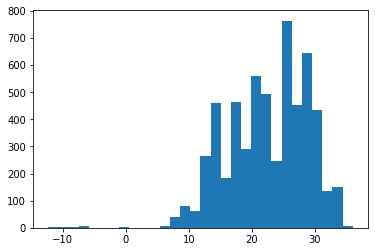

In [56]:
data = df.iloc[grouped.groups.get("AMB_TEMP"),3:].values.flatten()
n, bins, patches = plt.hist(data, bins=30)

In [61]:
data.std(dtype=np.float32)

6.289609

In [65]:
# normalize
for key, index in grouped.groups.items():
    item_values = df.iloc[ index, 3:].values.flatten()
    item_avg = item_values.mean(dtype=np.float32)
    item_std = item_values.std(dtype=np.float64)
    df.iloc[index,3:] = df.iloc[index,3:]-item_avg
    df.iloc[index,3:] = df.iloc[index,3:]/item_std
    print(key, item_avg, item_std)

AMB_TEMP -0.000595887 1.00008641772
CH4 0.00136936 1.00054689398
CO -0.000217957 1.00021134592
NMHC 0.000449827 1.00011257542
NO 0.000438515 1.00027509745
NO2 0.000185977 0.999926618178
NOx -0.000302299 0.999778532902
O3 -2.32008e-05 0.99997514111
PM10 -0.0004035 0.999988356255
PM2.5 -0.000464959 1.00015692165
RAINFALL -3.80701e-05 1.00025393935
RH -0.00154282 1.00006257246
SO2 -0.000321333 1.00012407531
THC -0.000828044 0.999716230687
WD_HR -0.000471973 0.999861401467
WIND_DIREC -0.000178983 1.00001298701
WIND_SPEED 0.000359551 0.999907092626
WS_HR -0.000182539 1.00004004371


In [70]:
grouped_bydate = df.groupby('date')

In [71]:
# 取連續9小時的資料當feature，預測第10小時的PM2.5
X_train = []
y_train = []
for date, index in grouped_bydate.groups.items():
    print(date)
    X_train.append(grouped_bydate.get_group(date).iloc[:,3:12].values.flatten())
    y_train.append(grouped_bydate.get_group(date).iloc[9,13])

2014-01-01 00:00:00
2014-01-02 00:00:00
2014-01-03 00:00:00
2014-01-04 00:00:00
2014-01-05 00:00:00
2014-01-06 00:00:00
2014-01-07 00:00:00
2014-01-08 00:00:00
2014-01-09 00:00:00
2014-01-10 00:00:00
2014-01-11 00:00:00
2014-01-12 00:00:00
2014-01-13 00:00:00
2014-01-14 00:00:00
2014-01-15 00:00:00
2014-01-16 00:00:00
2014-01-17 00:00:00
2014-01-18 00:00:00
2014-01-19 00:00:00
2014-01-20 00:00:00
2014-02-01 00:00:00
2014-02-02 00:00:00
2014-02-03 00:00:00
2014-02-04 00:00:00
2014-02-05 00:00:00
2014-02-06 00:00:00
2014-02-07 00:00:00
2014-02-08 00:00:00
2014-02-09 00:00:00
2014-02-10 00:00:00
2014-02-11 00:00:00
2014-02-12 00:00:00
2014-02-13 00:00:00
2014-02-14 00:00:00
2014-02-15 00:00:00
2014-02-16 00:00:00
2014-02-17 00:00:00
2014-02-18 00:00:00
2014-02-19 00:00:00
2014-02-20 00:00:00
2014-03-01 00:00:00
2014-03-02 00:00:00
2014-03-03 00:00:00
2014-03-04 00:00:00
2014-03-05 00:00:00
2014-03-06 00:00:00
2014-03-07 00:00:00
2014-03-08 00:00:00
2014-03-09 00:00:00
2014-03-10 00:00:00


In [185]:
type(X_train[0])

numpy.ndarray

In [186]:
test = np.matrix(X_train)

In [187]:
test_std = (test-test.mean(axis=0))/test.std(0)

In [101]:
class standardize():
    mean = None
    std = None
    def __init__(self):
        pass
    def fit(self, X):
        '''X as matrix like'''
        X = np.matrix(X)
        self.mean = X.mean(0, dtype=np.float32)
        self.std = X.std(0, dtype=np.float64)
    def transfer(self, X):
        try:
            return (X-self.mean)/self.std
        except:
            print("dimesion may be same of fitting")
            

In [102]:
std = standardize()

In [103]:
std.fit(X_train)

In [104]:
X = std.transfer(X_train)

In [139]:
np.asarray(X[0])

array([[-1.22604356, -1.18471687, -1.16727853, -1.31522786, -1.4819468 ,
        -1.46948573, -1.44690434, -1.48690598, -1.16563576,  1.02199048,
         1.00928796,  0.64841197,  0.62525599,  0.65734293,  0.66785557,
         0.65270389,  0.63741066,  0.6491594 ,  1.33167054,  0.77800618,
         0.86820451,  0.80783956,  0.62402244, -0.00881843,  0.06616805,
         0.00709125,  1.100789  ,  1.15142329,  0.63855099,  0.50983871,
         0.51661369,  0.28472324, -0.57192676, -0.22683241, -0.27090591,
         0.55888527, -0.45906764, -0.75660902, -1.02101791,  0.68634265,
         0.887078  ,  0.07543245, -0.17430634, -0.55071448,  0.28760259,
         1.38274443,  0.33771073,  0.39363473,  0.17634013,  0.14142493,
        -0.93488711, -0.42292295, -0.56360119,  0.4159188 ,  1.20518419,
         0.19213754,  0.20172247,  0.28619494,  0.25358282, -0.8441099 ,
        -0.41209826, -0.63444381,  0.41754346, -0.5954932 ,  0.54226257,
         0.27345139, -0.01753893,  0.09990069,  0.5

## gdcode
[thm](#gradient-descent)

In [148]:
# 
def loss_func( b, W, X=X_train, y=y_train):
    result = 0
    w = np.array(W)
    for idx in range(len(y)):
        result = result + ( y[idx] - b - np.dot(w, X[idx].T))**2
    return np.asscalar(result)

In [110]:
X_train[0].shape

(162,)

In [150]:
for i in range(10):
    W = np.random.rand(163)
    print(loss_func(W[0],W[1:], X, y_train))


168825.27024308784
127878.8604462963
147614.81881045102
142453.78395144935
150483.0173363828
151099.06217665778
144233.38096011797
142555.93672531703
153315.55320836444
148537.90066032275


In [97]:
def grad( b, W, X, y):
    """
    input b scale, W array_like
    ouput grad L(b,W)
    """
    card_datas = len(y)
    #b_array = np.full(card_datas, b)
    W = np.array(W)
    #X = np.ndarray(X)
    #y = np.array(y)
    feature_length = len(W)
    b_sum = 0
    w_sum = np.zeros(feature_length)
    for idx in range(card_datas):
        err = (y[idx] - b - np.dot(W, X[idx]))
        b_sum = b_sum - 2*err
        w_sum = w_sum - 2*err*X[idx]
    return (b_sum, w_sum)

In [90]:
import inspect
grad.__code__.co_varnames[:grad.__code__.co_argcount], grad.__defaults__

(('b', 'W', 'X', 'y'), None)

In [105]:
b = 0
W = np.zeros(162)
eta = 0.00001
loss_0 = loss_func(b,W)
loss_1 = loss_0 + 1 
for i in range(20):
    gb, gW = grad(b,W)
    b = b - eta*gb
    W = W - eta*gW
    print(loss_func(b,W))

ValueError: shapes (162,) and (1,162) not aligned: 162 (dim 0) != 1 (dim 0)

In [121]:
W = np.matrix(np.zeros(162))

In [122]:
W.shape

(1, 162)

In [143]:
b = 0
W = np.zeros(162)
eta = 0.00001
loss_0 = loss_func(b,W)
loss_1 = loss_0 -1 
count = 0
while True:
    tmp_err = loss_0 - loss_1 #error test avoid the loop too long
    gb, gW = grad(b,W)
    b = b - eta*gb
    W = W - eta*gW
    loss_0 = loss_1
    loss_1 = loss_func(b,W)
    count += 1
    if abs(tmp_err - loss_0 + loss_1) < 1e-6 or count > 5000:
        break
print(loss_0, loss_1)

C:\Users\Marshall\AppData\Local\conda\conda\envs\ML\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in double_scalars
  
C:\Users\Marshall\AppData\Local\conda\conda\envs\ML\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in double_scalars
  from ipykernel import kernelapp as app
C:\Users\Marshall\AppData\Local\conda\conda\envs\ML\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app
C:\Users\Marshall\AppData\Local\conda\conda\envs\ML\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  
C:\Users\Marshall\AppData\Local\conda\conda\envs\ML\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in subtract
C:\Users\Marshall\AppData\Local\conda\conda\envs\ML\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in multiply


nan nan


In [142]:
count

1

In [20]:
def haty(b, W, X):
    return b + np.dot(W,X)

In [21]:
test_df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,id_0,AMB_TEMP,15,14,14,13,13,13,13,13,12
1,id_0,CH4,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8
2,id_0,CO,0.36,0.35,0.34,0.33,0.33,0.34,0.34,0.37,0.42
3,id_0,NMHC,0.11,0.09,0.09,0.1,0.1,0.1,0.1,0.11,0.12
4,id_0,NO,0.6,0.4,0.3,0.3,0.3,0.7,0.8,0.8,0.9


In [117]:
def rainfall(raindata):
    '''rain data is object'''
    try:
        return float(raindata)
    except:
        return 0
    
def data_trans(df, item_index = 2, date_index = 0):
    '''transfer csv file to X,y forms with normalize
    here supports partitiion of datas is connected.
    train data item:2 date:0
    test data item:1 date:0'''
    data_start = item_index + 1
    data_end = data_start + 9 #
    columns = df.columns
    grouped_byitems = df.groupby(columns[item_index])
    grouped_bydate = df.groupby(columns[date_index])
    #trans object data to value
    df.iloc[grouped_byitems.groups.get("RAINFALL"), data_start:] = \
        df.iloc[grouped_byitems.groups.get("RAINFALL"), data_start:].\
        applymap(rainfall)
    # change data types
    df.iloc[:, data_start:] = df.iloc[:, data_start:].astype(float)
    #
    X_train = []
    y_train = []
    if data_end == 12:
        for date, index in grouped_bydate.groups.items():
            X_train.append(grouped_bydate.get_group(date).\
                           iloc[:,data_start:data_end].values.flatten())
            y_train.append(grouped_bydate.get_group(date).iloc[9,13])
    else:
        for date, index in grouped_bydate.groups.items():
            X_train.append(grouped_bydate.get_group(date).\
                           iloc[:,data_start:data_end].values.flatten())
    return  (X_train, y_train)


In [118]:
X, y = data_trans(df)

In [119]:
tX, ty = data_trans(test_df, item_index=1)

In [123]:
tX[0].size

162